In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('../data/merged_gold_data.csv', index_col=0, parse_dates=['date'])

In [33]:
df.dtypes

gold_last               float64
gold_open               float64
gold_high               float64
gold_low                float64
gold_volume             float64
gold_change_percent     float64
oil_last                float64
oil_open                float64
oil_high                float64
oil_low                 float64
oil_volume              float64
oil_change_percent      float64
dxy_last                float64
dxy_open                float64
dxy_high                float64
dxy_low                 float64
dxy_change_percent      float64
sp500_last              float64
sp500_open              float64
sp500_high              float64
sp500_low               float64
sp500_change_percent    float64
dtype: object

In [34]:
df.isna().sum()

gold_last               0
gold_open               0
gold_high               0
gold_low                0
gold_volume             0
gold_change_percent     0
oil_last                0
oil_open                0
oil_high                0
oil_low                 0
oil_volume              0
oil_change_percent      0
dxy_last                0
dxy_open                0
dxy_high                0
dxy_low                 0
dxy_change_percent      0
sp500_last              0
sp500_open              0
sp500_high              0
sp500_low               0
sp500_change_percent    0
dtype: int64

In [35]:
df

,gold_last,gold_open,gold_high,gold_low,gold_volume,gold_change_percent,oil_last,oil_open,oil_high,oil_low,...,dxy_last,dxy_open,dxy_high,dxy_low,dxy_change_percent,sp500_last,sp500_open,sp500_high,sp500_low,sp500_change_percent
date,,,,,,,,,,,,,,,,,,,,,
1993-01-01,333.10,333.30,333.50,333.00,20180.0,-0.06,19.50,19.59,19.65,19.48,...,92.36,92.17,92.43,91.94,0.00,435.70,438.90,439.60,435.70,-0.71
1993-01-02,333.10,333.30,333.50,333.00,20180.0,-0.06,19.50,19.59,19.65,19.48,...,92.36,92.17,92.43,91.94,0.00,435.70,438.90,439.60,435.70,-0.71
1993-01-03,333.10,333.30,333.50,333.00,20180.0,-0.06,19.50,19.59,19.65,19.48,...,92.36,92.17,92.43,91.94,0.00,435.70,438.90,439.60,435.70,-0.71
1993-01-04,328.40,329.10,329.40,326.50,14850.0,-1.41,19.04,19.43,19.49,19.00,...,93.46,92.39,93.63,92.38,1.19,435.40,435.70,437.30,434.50,-0.07
1993-01-05,329.00,329.00,329.50,328.50,20380.0,0.18,19.26,19.06,19.28,18.91,...,92.63,93.36,93.62,92.26,-0.89,434.30,435.30,435.40,433.60,-0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-19,3233.50,3220.00,3252.90,3209.10,185140.0,-0.15,62.14,61.98,62.70,60.99,...,100.43,100.90,100.90,100.06,-0.66,5963.60,5902.88,5968.61,5895.69,0.09
2025-05-20,3284.60,3233.00,3298.50,3207.40,224090.0,1.58,62.03,62.15,62.63,61.48,...,100.12,100.43,100.58,100.01,-0.31,5940.46,5944.66,5953.06,5909.26,-0.39
2025-05-21,3321.64,3293.00,3327.20,3287.00,5670.0,1.13,61.03,61.66,63.47,60.74,...,99.56,99.99,99.99,99.34,-0.56,5844.61,5910.18,5938.37,5830.91,-1.61


<Axes: title={'center': 'Gold Price Over Time'}, xlabel='date'>

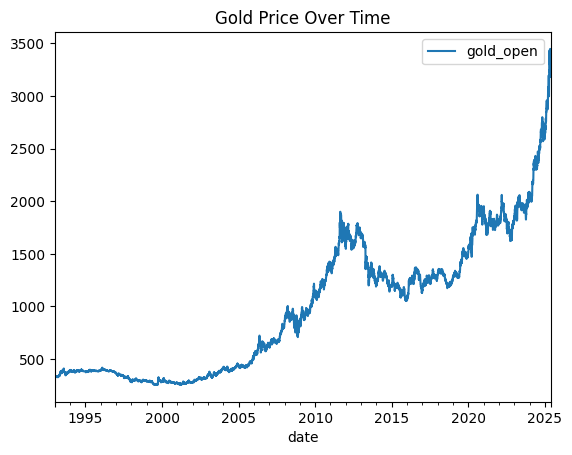

In [57]:
df.plot(title='Gold Price Over Time', y='gold_open')

In [ ]:
from statsmodels.tsa.stattools import kpss
kpss_result = kpss(df['gold_open'], regression='c', nlags='auto')
print(f"  - KPSS Statistic: {kpss_result[0]:.4f}")
print(f"  - p-value: {kpss_result[1]:.4f}")
print("  => non-stationary" if kpss_result[1] < 0.05 else "stationary ")


  - KPSS Statistic: 14.7170
  - p-value: 0.0100
  => non-stationary


/tmp/ipykernel_327266/212503486.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(df['gold_open'], regression='c', nlags='auto')


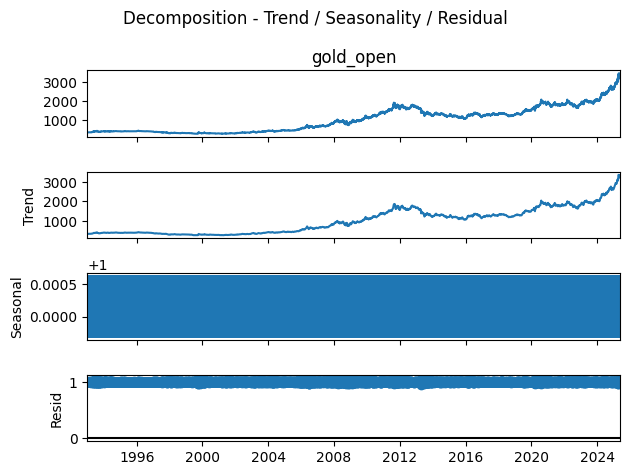

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df['gold_open'], model='multiplicative')
decomp.plot()
plt.suptitle("Decomposition - Trend / Seasonality / Residual")
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Processed Gold Price Over Time'}, xlabel='date'>

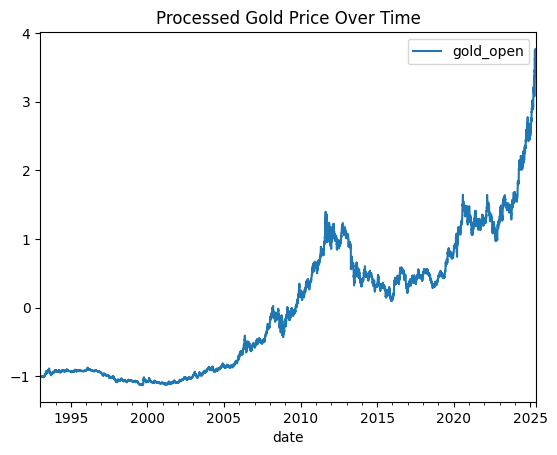

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
processed_df = df.copy()
processed_df = scaler.fit_transform(processed_df)
processed_df = pd.DataFrame(processed_df, columns=df.columns, index=df.index)
processed_df.plot(title='Processed Gold Price Over Time', y='gold_open')

Mutual Information:
gold_high               4.941181
gold_low                4.934764
gold_last               4.433396
sp500_high              2.882146
sp500_low               2.832657
sp500_open              2.825638
sp500_last              2.799145
oil_high                2.244183
oil_open                2.215817
oil_low                 2.200163
oil_last                2.173324
dxy_last                2.133446
dxy_low                 2.104146
dxy_high                2.103783
dxy_open                2.079190
gold_volume             1.720284
oil_volume              1.505336
gold_change_percent     0.983504
oil_change_percent      0.813271
sp500_change_percent    0.795227
dxy_change_percent      0.584376
dtype: float64


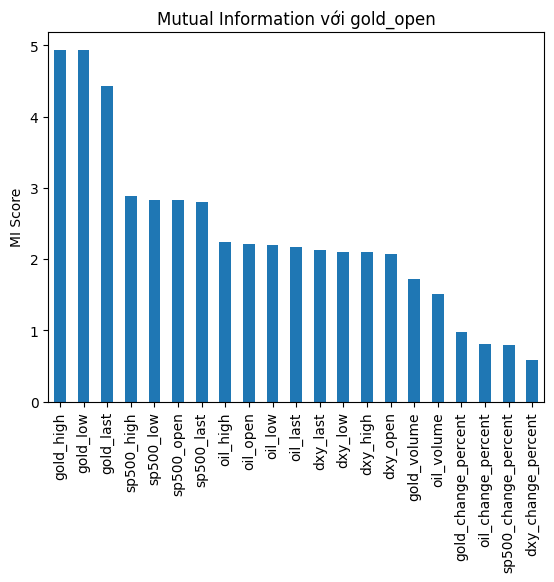

In [62]:
from sklearn.feature_selection import mutual_info_regression

y = df['gold_open'].values
X = df.drop(columns=['gold_open'])

mi = mutual_info_regression(X, y)

mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print("Mutual Information:")
print(mi_series)

mi_series.plot(kind='bar', title='Mutual Information với gold_open')
plt.ylabel("MI Score")
plt.show()

In [63]:
processed_df.to_csv('../data/processed_gold_data.csv')